## 1. Import packages and load data 

In [1]:
import pandas as pd
import os 
#os => operating system
import matplotlib.pyplot as plt

In [2]:
path = '/Users/antonytran/Documents/code/test_1_data_science/Sales-Reporting-main/data/'
dataframe = pd.read_csv(path + 'sales2019_1.csv')
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# 2.Clean and preprocess data

In [3]:
os.listdir(path)

['.DS_Store',
 'sales2019_3.csv',
 'sales2019_2.csv',
 'sales2019_1.csv',
 'sales2019_5.csv',
 'sales2019_4.csv',
 'sales2019_12.csv',
 'sales2019_10.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_11.csv',
 'sales2019_9.csv',
 'sales2019_8.csv']

In [4]:
#We don't need .DS_Store ==> get only the file has endswith = .csv
#Merge data : pd.concat(dataframe)
frames = []
all_len = 0
for i in os.listdir(path):
    if i.endswith('.csv'):
        file_path = path + i
        df= pd.read_csv(file_path)
        frames.append(df)
        result = pd.concat(frames)
        #Check if merge succeed or not: sum all the length of all 12 file 
        len_1f = len(df.index)
        all_len= all_len + len_1f
df_12month = result
df_12month.to_csv('sale_all_12_month.csv',index = False)
df_12month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [5]:
#The same length 186850 ==> merge succeed
print(all_len)

186850


## 2.2 Add 'Month' column

In [6]:
#del df_12month['info']
df_12month['Month']=''
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",


### Slice substring 'month in Order Date column' to get only 'month' 

In [7]:
df_12month['Order Date']

0        03/28/19 20:59
1        03/28/19 20:59
2        03/28/19 20:59
3        03/17/19 05:39
4        03/10/19 00:01
              ...      
12006    08/29/19 22:19
12007    08/31/19 16:26
12008    08/02/19 07:25
12009    08/08/19 12:10
12010    08/16/19 08:13
Name: Order Date, Length: 186850, dtype: object

In [8]:
df_12month['Order Date'].str.slice(start=0,stop=2,step=1)
#or df_12month['Order Date'].str[0:2] ok too

0        03
1        03
2        03
3        03
4        03
         ..
12006    08
12007    08
12008    08
12009    08
12010    08
Name: Order Date, Length: 186850, dtype: object

In [9]:
df_12month['Month']= df_12month['Order Date'].str.slice(start=0,stop=2,step=1)
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [10]:
### check and see 'nan' 'Or'
print(set(df_12month['Month']))

{nan, '12', '07', '04', '10', '11', 'Or', '01', '02', '05', '03', '06', '08', '09'}


## Get rid of 'nan' & 'Or' value

In [11]:
#find nan index : df_12month[df_12month['Month']=='nan']
#delete all the row that don't have 'nan' value (mean 'Order Date' have no value) 
df_12month = df_12month.dropna(how='all')
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [12]:
print(set(df_12month['Month']))

{'12', '07', '04', '10', '11', 'Or', '01', '02', '05', '03', '06', '08', '09'}


In [13]:
#find nan index : df_12month[df_12month['Month']=='Or']
df_12month[df_12month['Month']=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
9605,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10217,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10338,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [14]:
#keep columns that do not contain Or = delete columns contain Or
df_12month = df_12month[df_12month['Month']!='Or']

In [15]:
print(set(df_12month['Month']))

{'12', '07', '04', '10', '11', '01', '02', '05', '03', '06', '08', '09'}


# What was the best month for sales? and how much was earned that month?

In [16]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [17]:
#in the first these are object
print(df_12month['Quantity Ordered'].dtype)
print(df_12month['Price Each'].dtype)

object
object


### Convert Object to numeric

In [18]:
df_12month['Price Each'] = pd.to_numeric(df_12month['Price Each'],downcast='float')
df_12month['Quantity Ordered'] = pd.to_numeric(df_12month['Quantity Ordered'],downcast='integer')

In [19]:
df_12month['Sales']= df_12month['Quantity Ordered']* df_12month['Price Each']
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.000000
1,162009,Lightning Charging Cable,1,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.950000
2,162009,Wired Headphones,2,11.990000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.980000
3,162010,Bose SoundSport Headphones,1,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.989998
4,162011,34in Ultrawide Monitor,1,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.989990


### Move column

In [20]:
moving_col = df_12month.pop('Sales')
df_12month.insert(4,'Sales',moving_col)
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [21]:
df_12month.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903.0,1811768.375,1822256.75
02,13449.0,2188884.750,2202022.50
03,17005.0,2791207.750,2807100.25
04,20558.0,3367671.000,3390670.25
05,18667.0,3135125.000,3152606.75
06,15253.0,2562025.500,2577802.25
07,16072.0,2632539.500,2647775.75
08,13448.0,2230345.500,2244467.75
09,13109.0,2084992.125,2097560.00


In [22]:
df_12month.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [23]:
sales_value= df_12month.groupby('Month').sum()['Sales']
sales_value.max()

4613443.5

<BarContainer object of 12 artists>

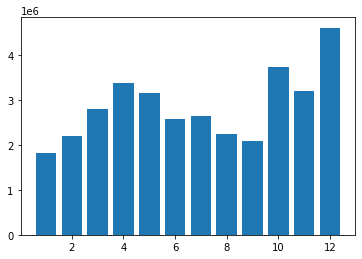

In [24]:
months = range(1,13)
plt.bar(x=months,height=sales_value)

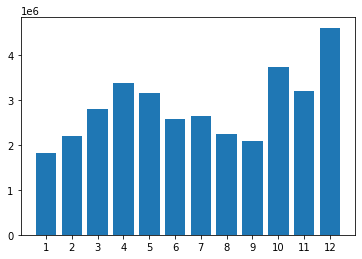

In [25]:
months = range(1,13)
plt.bar(x=months,height=sales_value)
#appear 1,3,5,7,.. :
plt.xticks(months);

Text(0, 0.5, 'Sales_value(USD)')

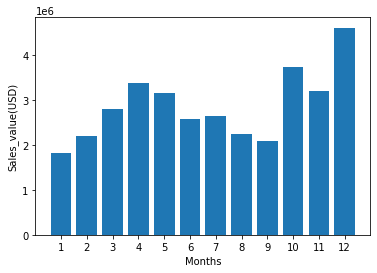

In [26]:
months = range(1,13)
plt.bar(x=months,height=sales_value)
plt.xticks(months);
plt.xlabel('Months')
plt.ylabel('Sales_value(USD)')

# ==> Best month for sales : 12 , value : 4613443.50

# What city has the best sales?

In [27]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [28]:
df_12month['Purchase Address'].apply(lambda x:x.split(',')[1])

0                Austin
1                Austin
2                Austin
3         San Francisco
4         San Francisco
              ...      
12006     San Francisco
12007            Boston
12008           Seattle
12009     San Francisco
12010       Los Angeles
Name: Purchase Address, Length: 185950, dtype: object

In [29]:
df_12month['City'] = df_12month['Purchase Address'].apply(lambda x:x.split(',')[1])

In [30]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [31]:
df_12month.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [32]:
#groupby => return alphabet
sale_city = df_12month.groupby('City').sum()['Sales']
sale_city.max()

8262204.0

In [33]:
print(sale_city)

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32


In [34]:
#cities = set(df_12month['City']) 
#or
cities = df_12month['City'].unique()
print(cities)
########but this is not Alphabet 

[' Austin' ' San Francisco' ' Boston' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' New York City' ' Seattle']


In [35]:
#Change to alphabet
sorted(cities)

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

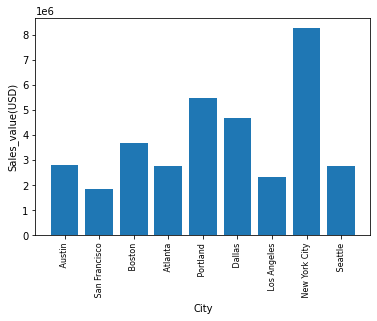

In [36]:
# Wrong match ctities and sale_city if we don't use sorted(cities)
plt.bar(x=cities,height=sale_city)
plt.xticks(cities,rotation=90,size=8);
plt.xlabel('City')
plt.ylabel('Sales_value(USD)');

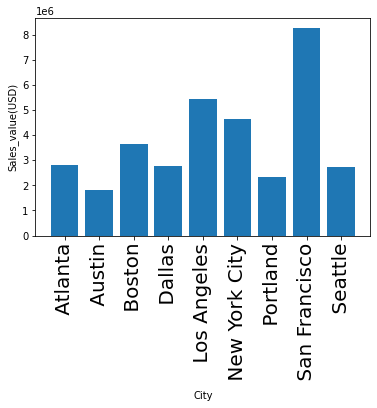

In [49]:
#Use sorted(cities) to change its to alphabet ==> match the sale_city now
plt.bar(x=sorted(cities),height=sale_city)
plt.xticks(cities,rotation=90,size=20)
plt.xlabel('City')
plt.ylabel('Sales_value(USD)');

# ==> San Francisco has the best sales

# What time should we display ads to maximize the likelihood of customer's buying product?

In [38]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [39]:
#object to datetime
df_12month['Order Date'].dtype

dtype('O')

In [40]:
df_12month['Order Date']=pd.to_datetime(df_12month['Order Date'])

In [41]:
print(df_12month['Order Date'].dtype)

datetime64[ns]


In [42]:
df_12month['Order Date'].dt.hour

0        20
1        20
2        20
3         5
4         0
         ..
12006    22
12007    16
12008     7
12009    12
12010     8
Name: Order Date, Length: 185950, dtype: int64

In [43]:
df_12month['Hours']= df_12month['Order Date'].dt.hour
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [44]:
#total orders placed by the hour ? ==> count.()
sales_hours = df_12month.groupby('Hours').count()['Sales']
print(sales_hours)

Hours
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64


In [45]:
hours = set(df_12month['Hours'])
print(hours)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


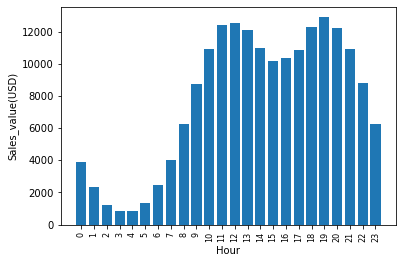

In [46]:
plt.bar(x=range(0,24),height=sales_hours)
plt.xticks(range(0,24),rotation=90,size=8)
plt.xlabel('Hour')
plt.ylabel('Sales_value(USD)');


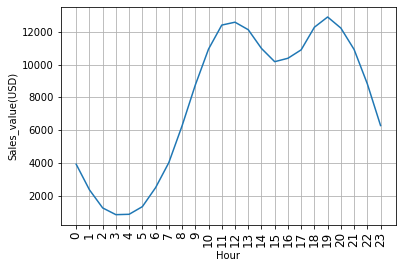

In [53]:
plt.plot(range(0,24),sales_hours)
plt.grid()
plt.xticks(range(0,24),rotation=90,size=12)
plt.xlabel('Hour')
plt.ylabel('Sales_value(USD)');

# What time should we display ads to maximize the likelihood of customer's buying product?
===> 11,12,18,19,20,..

# What products are most often sold together?


## ==> What products are most often purchased by the same person,at the same time? ==> same id,same time

In [64]:
#Find duplicate item :
df_dup = df_12month[df_12month['Order ID'].duplicated(keep = False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2


In [80]:
#Combine multiple rows into 1 row (we want to combine all the product of each id into 1 row)
df_dup_joined = df_dup.groupby('Order ID')['Product'].apply(lambda x:', '.join(x))#.reset_index()
print(df_dup_joined.head())
print(type(df_dup_joined))

Order ID
141275             USB-C Charging Cable, Wired Headphones
141290    Apple Airpods Headphones, AA Batteries (4-pack)
141365                  Vareebadd Phone, Wired Headphones
141384                 Google Phone, USB-C Charging Cable
141450           Google Phone, Bose SoundSport Headphones
Name: Product, dtype: object
<class 'pandas.core.series.Series'>


In [78]:
df_dup['All products']=df_dup_joined
df_dup.head()

<ipython-input-78-4f290909438a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All products']=df_dup_joined


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All products
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,NaN
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,NaN
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,NaN
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,NaN
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,NaN


## ==>Return NaN ?

In [93]:
#Try to use tranform 
df_dup_joined = df_dup.groupby('Order ID')['Product'].transform(lambda x:', '.join(x))#.reset_index()
print(df_dup_joined.head())
print(type(df_dup_joined))

0     iPhone, Lightning Charging Cable, Wired Headph...
1     iPhone, Lightning Charging Cable, Wired Headph...
2     iPhone, Lightning Charging Cable, Wired Headph...
30                     iPhone, Lightning Charging Cable
31                     iPhone, Lightning Charging Cable
Name: Product, dtype: object
<class 'pandas.core.series.Series'>


In [94]:
df_dup['All products']=df_dup_joined
df_dup.head()

<ipython-input-94-4f290909438a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All products']=df_dup_joined


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All products
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"


## ==>OK 

In [104]:
df_dup[['Order ID','All products']]

,Order ID,All products
0,162009,"iPhone, Lightning Charging Cable, Wired Headph..."
1,162009,"iPhone, Lightning Charging Cable, Wired Headph..."
2,162009,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,"iPhone, Lightning Charging Cable"
31,162037,"iPhone, Lightning Charging Cable"
...,...,...
11946,248088,"ThinkPad Laptop, Bose SoundSport Headphones"
11963,248105,"Google Phone, Wired Headphones"
11964,248105,"Google Phone, Wired Headphones"
11979,248120,"Google Phone, USB-C Charging Cable"


In [107]:
#Drop the duplicated row 
df_dup = df_dup[['Order ID','All products']].drop_duplicates()
df_dup.head()

,Order ID,All products
0,162009,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,"iPhone, Lightning Charging Cable"
60,162066,"AA Batteries (4-pack), USB-C Charging Cable"
66,162071,"Vareebadd Phone, USB-C Charging Cable"
78,162082,"Vareebadd Phone, Wired Headphones"


In [117]:
#Count number of value in  Column
df_dup['All products'].value_counts()


iPhone, Lightning Charging Cable                                                              882
Google Phone, USB-C Charging Cable                                                            856
iPhone, Wired Headphones                                                                      361
Vareebadd Phone, USB-C Charging Cable                                                         312
Google Phone, Wired Headphones                                                                303
                                                                                             ... 
iPhone, Lightning Charging Cable, Apple Airpods Headphones, Wired Headphones, Google Phone      1
LG Dryer, Google Phone                                                                          1
LG Dryer, Lightning Charging Cable                                                              1
iPhone, Lightning Charging Cable, Vareebadd Phone                                               1
iPhone, Lightning Ch

In [119]:
#Top 10 selling products
df_dup['All products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All products, dtype: int64

## ==> 10 products are most often sold together

In [120]:
#10 products at least
df_dup['All products'].value_counts().tail(10)

Vareebadd Phone, iPhone                                                                       1
Google Phone, Wired Headphones, AA Batteries (4-pack)                                         1
LG Dryer, Wired Headphones                                                                    1
Vareebadd Phone, Wired Headphones, Apple Airpods Headphones                                   1
LG Washing Machine, iPhone                                                                    1
iPhone, Lightning Charging Cable, Apple Airpods Headphones, Wired Headphones, Google Phone    1
LG Dryer, Google Phone                                                                        1
LG Dryer, Lightning Charging Cable                                                            1
iPhone, Lightning Charging Cable, Vareebadd Phone                                             1
iPhone, Lightning Charging Cable, 34in Ultrawide Monitor                                      1
Name: All products, dtype: int64

## ==> 10 products are least sold together

# What product sold the most ? why do u think it sold the most ? 

In [122]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [129]:
all_product_quantity = df_12month.groupby('Product').sum()['Quantity Ordered']
all_product = sorted(set(df_12month['Product']))
print(all_product_quantity,all_product)

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64 ['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 

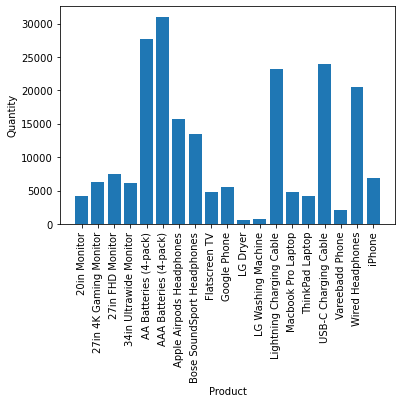

In [131]:
plt.bar(x=all_product,height=all_product_quantity)
plt.xticks(all_product,rotation=90,size=10)
plt.xlabel('Product')
plt.ylabel('Quantity');

<ipython-input-138-6f02e9bf7e12>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_product, rotation=90)


[Text(0.5, 0, 'Product'), Text(0, 0.5, 'Quantity')]

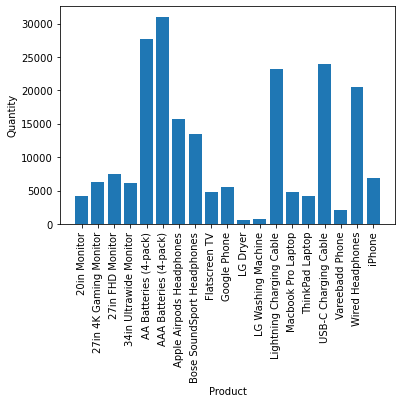

In [138]:
fig, ax = plt.subplots()
ax.bar(all_product,all_product_quantity)
ax.set_xticklabels(all_product, rotation=90)
ax.set(xlabel = 'Product',ylabel = 'Quantity')

In [132]:
price_each = df_12month.groupby('Product').mean()['Price Each']
print(price_each)

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32


## Draw multiple diagram

<ipython-input-149-837f50cead17>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_product, rotation=90)


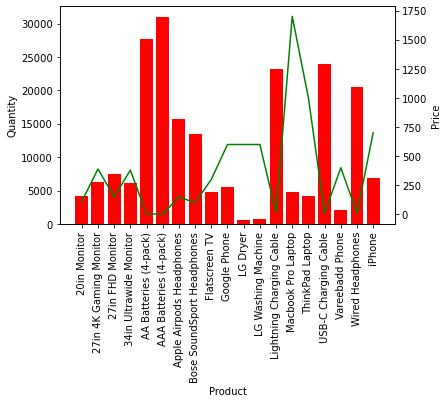

In [149]:
fig, ax = plt.subplots()
ax.bar(all_product,all_product_quantity, color='r')
ax.set_xticklabels(all_product, rotation=90)
ax.set(xlabel = 'Product',ylabel = 'Quantity')

#Use different scale in 1 subplot
#Same x==> no need twiny()
#ax1 = ax.twinx().twiny()
ax1 = ax.twinx()
ax1.set(ylabel = 'Price')
ax1.plot(all_product,price_each, c='g')

## ==> AAA Batteries (4-pack) & AA Batteries (4-pack) sold the most

## Because their prices are the lowest, they are bought the most